In [ ]:
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import matplotlib
font = {
        'weight' : 'bold',
        'size'   : 27}

matplotlib.rc('font', **font)
import h5py
import plotly.graph_objs as go
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
import pandas as pd
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]
store_path = rf"H:\phd stuff\tidy3d\data\08_29_2024 Florescu LSU Gaussian\z_incidence"

In [3]:
a=3.3
slices = np.array([14,14,14,14,14])*a


In [ ]:

#Convergence
for path_direction in [
                  #      r"H:\phd stuff\tidy3d\data\08_29_2024 Florescu LSU\z_incidence"
                  rf"H:\phd stuff\tidy3d\data\09_09_2024 Florescu LSU\z_incidence"
                      
                       ]:

      folder_path = f"{path_direction}"


      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue

            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                transmission0 = sim_data0['flux1'].flux
                transmission = sim_data['flux1'].flux
                transmission0_2 = sim_data0['flux2'].flux
                transmission_2 = sim_data['flux2'].flux
                transmission_normalized_1 = transmission / transmission0
                transmission_normalized_2 = transmission_2 / transmission0_2
                monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
                plt.figure(figsize=(20, 10))
                plt.scatter(monitor_lambdas,transmission_normalized_1, label=f"Right Monitor")
                plt.scatter(monitor_lambdas,transmission_normalized_2, label=f"Left Monitor")
                plt.xlabel(r'$\nu$')
                plt.ylabel('Transmission [%]')
                plt.legend()
                plt.grid()
                plt.yscale("log")
                plt.title(f"L={slices[i]/a}")
                plt.show()
      
    
        


     

               



In [ ]:
transmission0 = sim_data0['flux1_small'].flux
transmission = sim_data['flux1_small'].flux
transmission0_2 = sim_data0['flux2_small'].flux
transmission_2 = sim_data['flux2_small'].flux
transmission_normalized_1 = transmission / transmission0
transmission_normalized_2 = transmission_2 / transmission0_2
monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
plt.figure(figsize=(20, 10))
plt.scatter(monitor_lambdas,transmission_normalized_1, label=f"Right Monitor")
plt.scatter(monitor_lambdas,transmission_normalized_2, label=f"Left Monitor")
plt.xlabel(r'$\nu$')
plt.ylabel('Transmission [%]')
plt.legend()
plt.grid()
plt.yscale("log")
plt.title(f"L={slices[i]/a}")
plt.show()

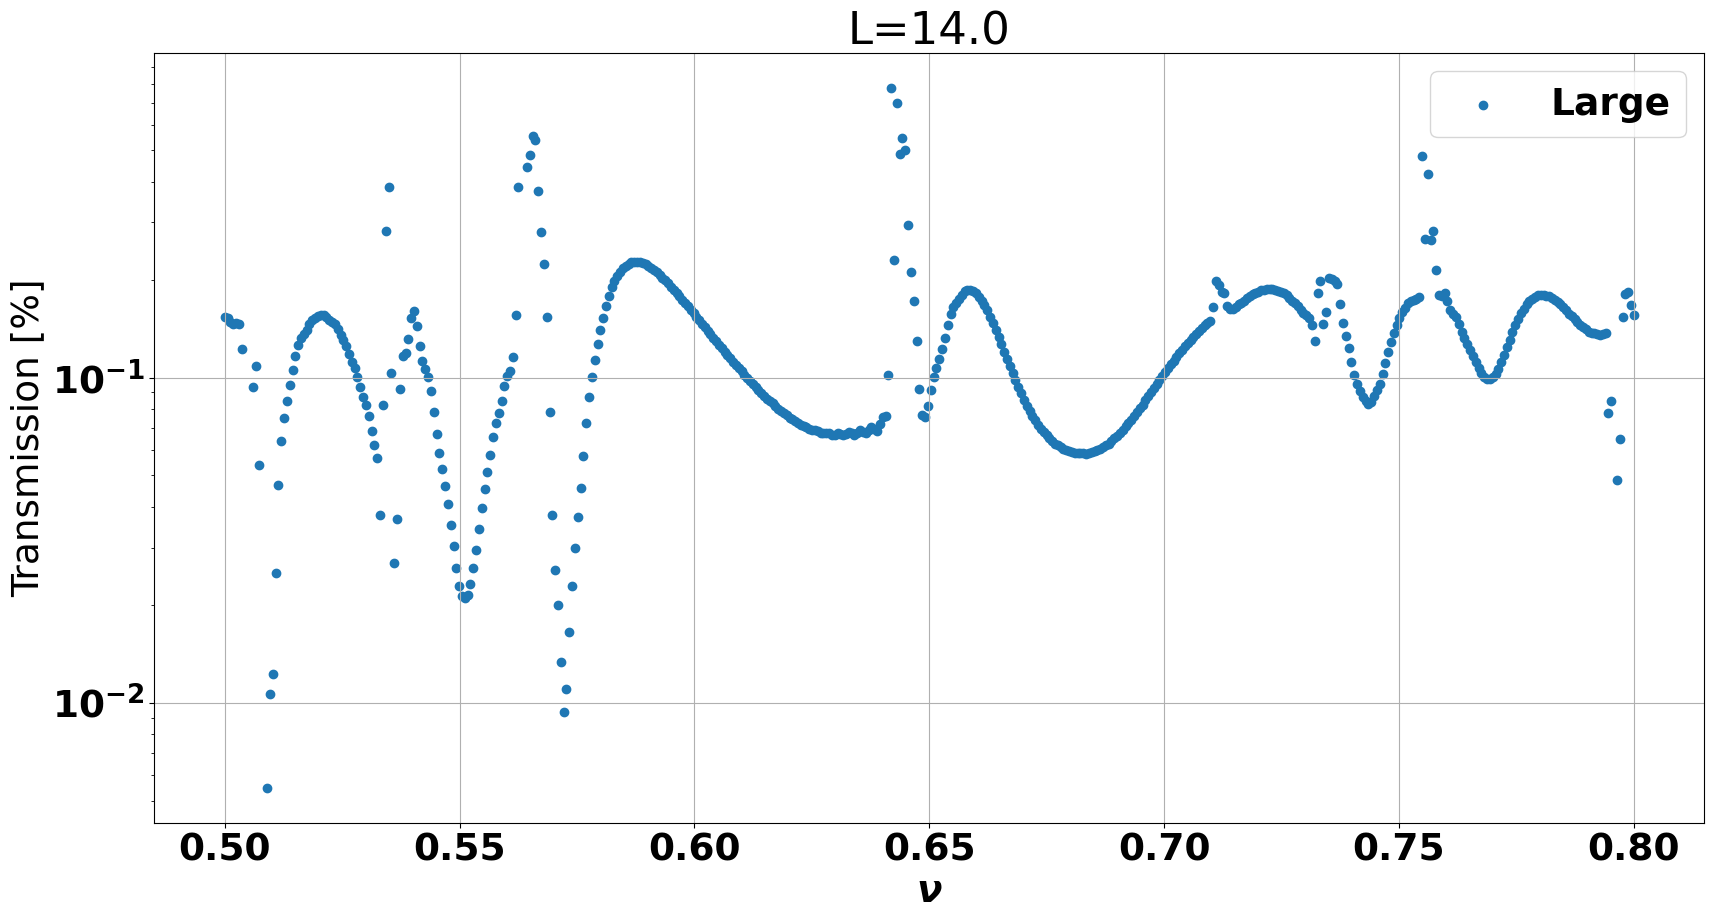

In [11]:
transmission0 = sim_data0['flux1_small'].flux
transmission = sim_data['flux1_small'].flux
transmission0_2 = sim_data0['flux2_small'].flux
transmission_2 = sim_data['flux2_small'].flux
transmission_normalized_1 = transmission / transmission0
transmission_normalized_2 = transmission_2 / transmission0_2
monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
plt.figure(figsize=(20, 10))
# plt.scatter(monitor_lambdas,transmission_normalized_1, label=f"Right Monitor")
# plt.scatter(monitor_lambdas,transmission_normalized_2, label=f"Left Monitor")
plt.scatter(monitor_lambdas,sim_data0['flux1_small'].flux/sim_data0['flux1'].flux, label=f"Large")
plt.xlabel(r'$\nu$')
plt.ylabel('Transmission [%]')
plt.legend()
plt.grid()
plt.yscale("log")
plt.title(f"L={slices[i]/a}")
plt.show()